---
title: Birkhoff+
date: 07/12/2021
---

This page contains my reading notes on 

- [**Birkhoff’s Decomposition Revisited: Sparse Scheduling for High-Speed Circuit Switches**](https://www.semanticscholar.org/paper/Birkhoff's-Decomposition-Revisited%3A-Sparse-for-Valls-Iosifidis/e9c0e0d1bf7c220e9f471b6fe28bce2c45929c3c)

## Problem definition:
For a given $n \times n$ doubly stochastic matrix $X^{\star}$ and an $\epsilon \geq 0$, our goal is to find a small collection of permutation matrices $P_{1}, P_{2}, \ldots, P_{k}$, and weights $\theta_{1}, \theta_{2}, \ldots, \theta_{k}$ with $\sum_{i=1}^{k}\theta_{i} \leq 1$ such that $\lVert X^{\star} - \sum_{i=1}^{k}\theta_{i}P_{i} \rVert_{F} \leq \epsilon$.

## Definitions
1. When applied to vectors or matrices, $+, -, \cdot$ are all element-wise operations and we write $x < (\leq, >, \geq ) y$ when all elements of $x$ are $< (\leq, >, \geq)$ of all elements of $y$.
1. Doubly stochastic matrix: a doubly stochastic matrix is a square matrix of non-negative real numbers, each of whose rows and columns sums to 1.
1. Frobenius norm: $\lVert X \rVert_{F} = \sqrt{\sum_{i, j}\vert X(i, j) \vert^2}$, which is the same as the l2 norm of a vector: $\lVert x \rVert_{2} = \sqrt{\sum_{i}\vert x(i) \vert^2}$
1. Convex hull $\mathrm{conv}(A)$: The convex hull of set A ($\mathrm{conv}(A)$) is the smallest convex set that contains set $A$.
1. Birkhoff polytope $\mathcal{B}$: the convex set that contains all doubly stochastic matrices of size $n \times n$. 
1. Permutation matrices $\mathcal{P}$: the extreme points of the Birkhoff polytope.
1. Linear program $\mathrm{LP}(c, \mathcal{X})$: minimize $c^{T}x$, subject to $x \in \mathcal{X}$. We assume that the solution returned is always an extreme point ($x \in \mathcal{P}$ if $\mathcal{X} = \mathcal{B}$). 
1. Birkhoff step: $\mathrm{STEP}(X^{\star}, X_{k-1}, P_{k}) = \min_{a,b}\{(X^{\star}(a, b) - X_{k-1}(a,b) - 1)P_{k}(a,b) + 1\}$. It computes the step size (weight) by taking the minimum non-zero element of the difference matrix (masked by the permutation matrix $P_{k}$) between $X^{\star}$ and $X$.

## Algorithms (All matrices ($X$) are represented using vectors ($x$) by stacking the matrix columns)

### General Birkhoff algorithm (Algorithm 1, 2 and 3)

> 1. $x_{0} = 0, k = 0$
> 1. **while** $\lVert x^{\star} - x_{k-1} \rVert_{2} > \epsilon$ and $k \leq k_{max}$ **do**
> 1. &ensp; $\alpha \gets (1 - \sum_{i=1}^{k-1}\theta_{i}) \mathbin{/} n^2$ // **(Why this value)**
> 1. &ensp; $p_{k} \gets p \in \mathcal{I}_{k}(\alpha)$ &ensp; // Get next permutation matrix 
> 1. &ensp; $\theta_{k} \gets$ $\mathrm{STEP}(x^{\star}, x_{k-1}, p_k)$ &ensp; // Get next weight based on the new permutation matrix
> 1. &ensp; $x_{k} \gets x_{k-1} + \theta_{k}p_{k}$
> 1. &ensp; $k \gets k + 1$
> 1. **end while**
> 1. **return** $(p_{1}, \ldots, p_{k-1})$, $(\theta_{1}, \ldots, \theta_{k-1})$

1. $n$ is the size of $X^{\star}$ and $d=n^2$ is the number of elements in $X^{\star}$.
1. $\mathcal{I}_{k}(\alpha) =\{P \in \mathcal{P} \mid X_{k-1}(a,b) + \alpha P(a,b) \leq X^{\star}(a,b) \}$. 
    1. If $P_{k} \in \mathcal{I}_{k}(\alpha)$, then $(X^{\star} - X_{k-1}) \cdot P_{k} \geq \alpha$, (each element of the difference matrix between $X^{\star}$ and $X_{k-1}$ masked by $P_{k}$ is $\geq \alpha$). 
    1. Since $\mathrm{STEP}(X^{\star}, X_{k-1}, P_{k})$ is taking the minimum of non-zero element of $(X^{\star} - X_{k-1}) \cdot P_{k}$ (definition 7), $\mathrm{STEP}(X^{\star}, X_{k-1}, P_{k}) \geq \alpha$
1. Due to the definitions of $\mathcal{I}_{k}(\alpha)$ and $\mathrm{STEP}$, $x_{k} \leq x^{\star}$ all the time. 
    1. Birkhoff algorithm can be seen as constructing a path from the origin ($x_{0} = 0$) to $x^{\star}$ while always remaining in a dotted box, where $x_{0}$ and $x^{\star}$ are two diagonal vertices of the box ($x_{k} \leq x^{\star}$).
1. General Birkhoff algorithm doesn't specify which specific permutation to select from $\mathcal{I}_{k}(\alpha)$.

#### Classic Birkhoff algorithm (Algorithm 4)

> 1. $x_{0} = 0, k = 0$
> 1. **while** $\lVert x^{\star} - x_{k-1} \rVert_{2} > \epsilon$ and $k \leq k_{max}$ **do**
> 1. &ensp; $p_k \gets \mathrm{LP}(-\lceil x^{\star} - x_{k-1} \rceil, \mathcal{B})$.
> 1. &ensp; $\theta_{k} \gets$ $\mathrm{STEP}(x^{\star}, x_{k-1}, p_k)$ &ensp;
> 1. &ensp; $x_{k} \gets x_{k-1} + \theta_{k}p_{k}$
> 1. &ensp; $k \gets k + 1$
> 1. **end while**
> 1. **return** $(p_{1}, \ldots, p_{k-1})$, $(\theta_{1}, \ldots, \theta_{k-1})$

1. The only slight difference is line 3, which is essentially doing the same thing with general Birkhoff algorithm.
    1. Since $x^{\star} - x_{k-1} \in [0, 1]$, its ceiling ($\lceil x^{\star} - x_{k-1} \rceil$) makes all nonzero elements to be 1, which makes $\mathrm{LP}$ treat all nonzero elements equally.

### Frank-Wolfe (FW) algorithm (Algorithm 5)

> 1. $x_{0} \in \mathcal{P}, k = 0$
> 1. **while** $\lVert x^{\star} - x_{k-1} \rVert_{2} > \epsilon$ and $k \leq k_{max}$ **do**
> 1. &ensp; $p_k \gets \mathrm{LP}(-(x^{\star} - x_{k-1}), \mathcal{B})$ // Get the next extreme point 
> 1. &ensp; $\theta_{k} \gets (x^{\star} - x_{k-1})^{T}(p_{k} - x_{k-1}) \mathbin{/} \lVert p_{k} - x_{k-1} \rVert_{2}^{2}$ // Calculate the step size
> 1. &ensp; $x_{k} \gets x_{k-1} + \theta_{k}(p_{k} - x_{k-1})$ // Update x
> 1. &ensp; $k \gets k + 1$
> 1. **end while**
> 1. **return** $(p_{1}, \ldots, p_{k-1})$, $(\theta_{1}, \ldots, \theta_{k-1})$

1. The assumption of the FW algorithm is that there always exists an extreme point in the Birkhoff polytope (permutation matrix $p_{k}$) that is a direction ($p_{k} - x_{k-1}$) in which it is possible to improve the objective function.
    1. Since each extreme point of the Birkhoff polytope is an permutation matrix and thus the each step size can be considered as the weight of the permutation matrix, FW algorithm can be used to solve Birkhoff problem. 
1. The paper selects the objective function to be $f(x) = \frac{1}{2} \lVert x - x^{\star} \rVert_{2}^{2}$, which measures the square of the $l_{2}$ norm of the difference between the current matrix $x_{k}$ and the objective matrix $x^{\star}$.
    1. The solving of $\mathrm{LP}$ at line 3 is essentially trying to find an extreme point $p_{k}$ in the Birkhoff polytope by solving ${\mathrm{argmin}_{u \in \mathcal{P}}}\nabla f(x_{k-1})^{T}u$, in which $\nabla f(x_{k-1}) = -(x^{\star} - x_{k-1})$.
    1. The way to calculate $\theta_{k}$ at line 4 is derived by solving $f(x_{k}) - f(x_{k-1})$.
    1. Note at line 5 $x_{k} = x_{k-1} + \theta_{k}(p_{k} - x_{k-1}) = (1 - \theta)x_{k-1} + \theta_{k}p_{k}$, so $x_{k}$ is still a linear combination of permutation matrices.
1. Difference with the Birkhoff algorithm: 
    1. FW uses a random extreme point instead of 0 as the starting point, since it requires $x_{k} \in \mathcal{B}$ at all time.
    1. FW does not require that $x_{k} \leq x^{\star}$ and thus $x^{\star}$ can be approximated from any direction.

#### Fully Corrective Frank-Wolfe (Algorithm 6)
1. FCFW provides the best approximation with the number of extreme points selected up to iteration k

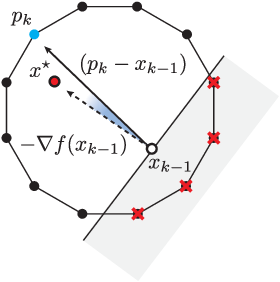

In [4]:
from IPython.display import Image
Image(filename='1.png') 

## Birkhoff+ algorithm (Algorithm 7)

> 1. $x_{0} = 0, k = 0$
> 1. **while** $\lVert x^{\star} - x_{k-1} \rVert_{2} > \epsilon$ and $k \leq k_{max}$ **do**
> 1. &ensp; $\alpha \gets (1 - \sum_{i=1}^{k-1} \theta_i) \mathbin{/} n^2$
> 1. &ensp; $p_{k} \gets \mathrm{LP}(\nabla f_{\beta}(x_{k-1}), \mathrm{conv}(\mathcal{I}_{k}(\alpha)))$
> 1. &ensp; $\theta_{k} \gets$ $\mathrm{STEP}(x^{\star}, x_{k-1}, p_k)$
> 1. &ensp; $x_{k} \gets x_{k-1} + \theta_{k}p_{k}$
> 1. &ensp; $k \gets k + 1$
> 1. **end while**
> 1. **return** $(p_{1}, \ldots, p_{k-1})$, $(\theta_{1}, \ldots, \theta_{k-1})$

1. Birkhoff+ combines Birkhoff algorithm and FW algorithm. This approach wants to use the path or permutations that FW would select while remaining in the box that characterizes the Birkhoff’s approach.
1. The only real difference between Birkhoff+ and Birkhoff is the way to compute $p_{k}$ (line 4). 
1. $f_{\beta}(x) = f(x) - \beta \sum_{j=1}^{d} \log(x^{\star}(j) - x(j) + \frac{\epsilon}{d})$, which consists $f(x)$ (same as what is used in FW) and $- \beta \sum_{j=1}^{d} \log(x^{\star}(j) - x(j) + \frac{\epsilon}{d})$ (the barrier).
    1. The barrier is a penalty term that restricts the $x_{k}$ to always remain in the Birkhoff box. 
        1. If we ignore $\frac{\epsilon}{d}$ and $\beta$, $-\sum_{j=1}^{d} \log(x^{\star}(j) - x(j)) \to \infty$ if any $x^{\star}(j) \approx x(j)$. That is, the penalty will be very high if any of the element of $x$ is closed to $x^{\star}$. 
        1. Since $x_{0} = 0 < x^{\star}$ at the starting point and the barrier will prevent all elements of $x$ getting closed to $x^{\star}$, the barrier can prevent $x > x^{\star}$. 
    1. $\beta$ is a hyper-parameter that balances the objective function and the barrier. In the code, it is tuned smaller and smaller as the $x_{k}$ is getting closed to $x^{\star}$.
    1. $\frac{\epsilon}{d}$ is used to avoid $\log \to \infty$.
1. $\mathrm{LP}(\nabla f_{\beta}(x_{k-1}), \mathrm{conv}(\mathcal{I}_{k}(\alpha))) = \mathrm{LP}(\nabla f_{\beta}(x_{k-1}) + b_{k}, \mathcal{B})$, where $b_{k} = \frac{\epsilon}{d} \cdot \mathbb{1}(x^{\star} - x_{k-1} \leq \alpha)$ is a penalty vector to force the solver to do not select the elements of vector $(x^{\star} - x_{k})$ smaller than $\alpha$.
    1. For all elements of vector $(x^{\star} - x_{k})$ smaller than $\alpha$, $b_{k} = \frac{\epsilon}{d}$. Otherwise, $b_{k} = 0$.

### Birkhoff+ (max_rep) algorithm (Algorithm 8)

> 1. $x_{0} = 0, k = 0$
> 1. **while** $\lVert x^{\star} - x_{k-1} \rVert_{2} > \epsilon$ and $k \leq k_{max}$ **do**
> 1. &ensp; $\alpha \gets (1 - \sum_{i=1}^{k-1} \theta_i) \mathbin{/} n^2$
> 1. &ensp; **for** $i = 1,\ldots, \mathrm{max\_rep}$ **do**
> 1. &ensp; &ensp; $p_{i} \gets \mathrm{LP}(\nabla f_{\beta}(x_{k-1}), \mathrm{conv}(\mathcal{I}_{k}(\alpha)))$
> 1. &ensp; &ensp; $\theta_{i} \gets \mathrm{STEP}(x^{\star}, x_{k-1}, p_{k})$
> 1. &ensp; &ensp; **if** $(\theta_{i} > \alpha)$ $\alpha \gets \mathrm{STEP}(x^{\star}, x_{k-1}, p_{k})$
> 1. &ensp; &ensp; **else** exit while loop
> 1. &ensp; &ensp; $p_{k} \gets p_{i}$
> 1. &ensp; **end for**
> 1. &ensp; $\theta_{k} \gets$ $\mathrm{STEP}(x^{\star}, x_{k-1}, p_k)$
> 1. &ensp; $x_{k} \gets x_{k-1} + \theta_{k}p_{k}$
> 1. &ensp; $k \gets k + 1$
> 1. **end while**
> 1. **return** $(p_{1}, \ldots, p_{k-1})$, $(\theta_{1}, \ldots, \theta_{k-1})$

1. Instead of using a constant $\alpha$, Birkhoff+ (max_rep) searches the largest $\alpha$ in each iteration by alternatively updating $\alpha$  and $p_{k}$ until $\alpha$ cannot be updated larger or $\mathrm{max\_rep}$ iterations is reached. 
    1. Larger $\alpha$ $\to$ larger $\theta$ $\to$ less number of permutation matrices. 
    1. $\alpha$ is set to be the largest step size (weight from $\mathrm{STEP}$ function) found so far.

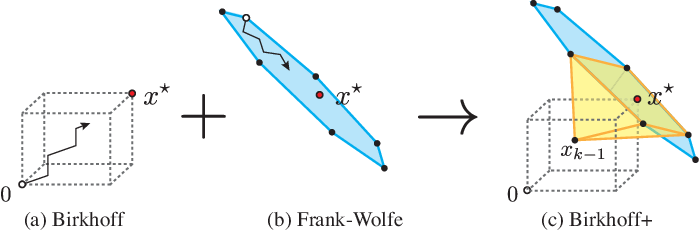

In [3]:
from IPython.display import Image
Image(filename='2.png') 

### Source code with comment
https://github.com/vvalls/BirkhoffDecomposition.jl

In [1]:
using JuMP
using Clp
using Random
using SparseArrays

In [2]:
# functionsBD.jl

struct polytope
    A;
    b;
    l;
    u;
    model;
    x;
end

@doc raw"""
Solve a linear programing problem
"""
function LP(c, P)
    @objective(P.model, Min, c'* P.x)
    optimize!(P.model)
    return value.(P.x)
end

@doc raw"""
Get a random stochastic matrix
"""
function randomDoublyStochasticMatrix(n; num_perm=n^2)
    M = zeros(n, n);
    α = rand(num_perm)

    α = α / sum(α);

    for i = 1:num_perm
        perm = randperm(n);
        for j = 1:n
            M[perm[j], j] += α[i];
        end
    end

    return M;
end


@doc raw"""
Create Birkhoff polytope ``\mathcal{B}`` (Section V-A), which contains all possible doublely stochastic matrices.

Since the paper assumes that the solutions by solving linear programs over are Birkhoff polytope extreme points, 
the solutions are permutation matrices (which are also doublely stochastic). 
"""
function birkhoffPolytope(n)
    # x is a doublely stochastic matrix that is represented by a vector (flattened).
    # Use a constant matrix A(M') and a constant vector b to specify that x is doublely stochastic.
    
    M = zeros(n*n, 2*n);
    # Specify the sum of each row of x equals to 1
    for i = 1:n
        M[(i-1)*n*n + (i-1)*n + 1 : (i-1)*n*n + (i-1)*n + n] = ones(n,1);
    end
    # Specify the sum of each col of x equals to 1
    for i = 1:n
        for j=1:n
            M[n*n*n + (i-1)*n*n + (j-1)*n + i] = 1;
        end
    end

    A = sparse(M');
    b = ones(2*n);

    model = Model(Clp.Optimizer)
    set_silent(model)
    @variable(model, 0 <= x[1:n*n] <= 1)
    @constraint(model, A * x .== b)

    return polytope(A, b, 0, 1, model, x)

end

birkhoffPolytope

In [3]:
# stepsizes.jl

@doc raw"""
Get the step size (weight) by taking the minimum non-zero entry of the difference matrix 
(masked by the permutation matrix y) between x_star and x.
"""
function getBirkhoffStepSize(x_star, x, y)
    return minimum((x_star - x).*y - (y.-1));
end

getBirkhoffStepSize

In [4]:
# extremepoints.jl

@doc raw"""
Birkhoff+ (max_rep) Psudocode line 4-10
"""
function getEPBplus(x_star, x, B, max_rep, ε)
    n = sqrt(size(x_star, 1))
    d = size(x_star, 1);
    i = 1;
    y = 0;
    α = 0;

    while(i <= max_rep)
        # Calculate \beta for this iteration.
        # \beta should become smaller and smaller.
        z = Int16.(x_star - x .> ε)
        s = getBirkhoffStepSize(x_star, x, z)
        beta = (s + ε/d)*0.5

        # c is the gradient of the objective function with barrier.
        # b is an iterm added to make I_k(\alpha) to be B (Birkhoff polytope).
        # See the paragraph in section VI.B after Corollary 2 for b.
        c = -ones(d) + beta ./ (x_star - x .+ ε/d)
        b = (n/ε).*Int16.(x_star - x .<= α)
        y_iter = LP(c + b, B);
        
        # If new solution (y_iter) makes objective function larger/worse (c'*y_iter > c'*y_z),
        # fall back to the solution from the last iteration (y_z/x).
        y_z = x;
        if(c'*y_iter > c'*y_z)
            y_iter = y_z
        end

        # \alpha should be the largest step size found. 
        # Algorithm terminates when \alpha doesn't increase
        α_iter = getBirkhoffStepSize(x_star, x, y_iter);
        if(α < α_iter)
            α = α_iter;
            y = y_iter;
        else
            return y;
        end
        i = i + 1;
    end

    return y
end

getEPBplus (generic function with 1 method)

In [5]:
# birkdecomp.jl

@doc raw"""
Birkhoff+ (max_rep)
"""
function birkdecomp(X, ε=1e-12; max_rep=1)
    n = size(X, 1);                                 # get size of Birkhoff polytope
    x_star = reshape(X, n*n);                       # reshape doubly stochastic to vector
    B = birkhoffPolytope(n);                        # Birkhoff polytope
    ε = max(ε, 1e-15);                              # fix the maximum minimum precision
    max_iter = (n-1)^2 + 1;

    x = zeros(n*n);                                 # initial point

    extreme_points = zeros(n*n, max_iter);          # extreme points (permutation) matrix
    θ = zeros(max_iter);                            # weights vector
    approx = Inf;                                   # approximation error
    i = 1;                                          # iteration index

    while(approx > ε)
        # Get next extreme point 
        y = getEPBplus(x_star, x, B, max_rep, ε)
        # Get next weight (step size)
        θi = getBirkhoffStepSize(x_star, x, y)
        # Update x_k
        x = x + θi*y;
        # Store the new weight
        θ[i] = θi;

        # Update the Frobenius norm
        approx = sqrt(sum((abs.(x_star-x)).^2));
        
        # Store the new extreme point matrix
        extreme_points[:,i] = y;
        i = i + 1;
    end

    return extreme_points[:, 1:i-1], θ[1:i-1]

end

birkdecomp (generic function with 2 methods)

In [6]:
# Generate a random doubly stochastic matrix (n is the dimension)
n = 3;
x = randomDoublyStochasticMatrix(n);
P, w = birkdecomp(x);

display(x)
display(P);
display(w);

3×3 Array{Float64,2}:
 0.0607488  0.590595   0.348656
 0.70177    0.0291194  0.269111
 0.237482   0.380286   0.382233

9×5 Array{Float64,2}:
 0.0  0.0  0.0  1.0  0.0
 1.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  1.0
 1.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0
 0.0  1.0  0.0  1.0  0.0
 0.0  1.0  0.0  0.0  1.0
 0.0  0.0  1.0  1.0  0.0
 1.0  0.0  0.0  0.0  0.0

5-element Array{Float64,1}:
 0.38223288955133716
 0.31953666864401353
 0.20836217653438616
 0.06074883235172196
 0.029119432918541188

In [7]:
x_new = zeros(n, n)
for i=1:length(w)
    x_new = x_new + w[i] * reshape(P[:, i], n, n) 
end
display(x_new)

3×3 Array{Float64,2}:
 0.0607488  0.590595   0.348656
 0.70177    0.0291194  0.269111
 0.237482   0.380286   0.382233